#Decision Tree
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

here are 4 popular types of decision tree algorithms:
###1.ID3, 
###2.CART (Classification and Regression Trees), 
##**3.Chi-Square** 
###4.Reduction in Variance

#Chi-Square
Chi-Square is a statistical measure to find the difference between child and parent nodes. To calculate this we find the difference between observed and expected counts of target variable for each node and the squared sum of these standardized differences will give us the Chi-square value.

###DecisionTreeRegression(CHAID)
####Decision tree regression using CHAID (Chi-squared Automatic Interaction Detection) is a popular algorithm for building regression trees. In this approach, the algorithm recursively partitions the data into smaller subsets based on the predictor variables that have the strongest association with the target variable.

#Formula 
##**√((y – y’)2 / y’)**

Here are the step-by-step algorithm for decision tree regression:

**step1**:Start with the entire dataset as the root node.

**step2**:Choose a predictor variable that has a significant association with the target variable, and perform a chi-squared test to determine the best way to split the data into two subsets based on the values of that predictor variable.

**step3**:If the chi-squared test indicates a significant difference between the subsets, create two child nodes and repeat steps 2-3 for each of the child nodes. If the chi-squared test does not indicate a significant difference, stop and make the current node a leaf node.

**step4**:When creating child nodes, repeat the process until a stopping criterion is reached. This could be a maximum tree depth, a minimum number of samples in a leaf node, or a minimum improvement in the chi-squared statistic.

**step5**:Continue building the tree until all the nodes have been split or the stopping criterion has been reached.

**step6**:To make a prediction for a new data point, traverse the tree starting from the root node and following the branches based on the values of the predictor variables until you reach a leaf node. The output of the leaf node is the predicted value for the new data point.




In [3]:
import numpy as np # import numpy package for arrays 
import pandas as pd # import pandas for importing csv files


In [46]:
class CHAIDDecisionTreeRegressor:
    
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth  #determines the maximum depth of the decision tree that will be constructed
        self.min_samples_split = min_samples_split #specifies the minimum number of samples required to split an internal node
        self.tree = {}
        self.best_params_ = {}
   
    def mse(self, y):
        # Calculate mean squared error of targets
        return np.mean((y - np.mean(y))**2)
    
    
   
    def split_data(self, feature, split, X, y):
        left_indices = np.where(X[:, feature] < split) # find the indices of samples where the feature is less than the split value,(np.where)
        right_indices = np.where(X[:, feature] >= split) # find the indices of samples where the feature is greater than or equal to the split value
        X_left = X[left_indices] #create a new array of input samples for the left node using the left indices
        y_left = y[left_indices] #create a new array of labels for the left node using the left indice
        X_right = X[right_indices] # create a new array of input samples for the right node using the right indices
        y_right = y[right_indices] # create a new array of labels for the right node using the right indices
        return X_left, y_left, X_right, y_right # return the new input and label arrays for the left and right nodes
   
   
    def chi_squared_test(self, x, y):
        # Perform chi-squared test to determine if a split is significant
        n_total = len(y) # calculate the total number of samples
        n_left = len(np.where(x < x.mean())[0]) # calculate the number of samples in the left node (where x is less than the mean of x)
        n_right = n_total - n_left # calculate the number of samples in the right node
        p_left = n_left / n_total # calculate the   samples in the left node
        p_right = n_right / n_total # calculate the  samples in the right node
        y_left_mean = np.mean(y[x < x.mean()]) # calculate the mean of the labels for the samples in the left node
        y_right_mean = np.mean(y[x >= x.mean()])  # calculate the mean of the labels for the samples in the right node
        y_total_mean = np.mean(y) # calculate the mean of the labels for all the samples
        chi_squared = (n_left * (y_left_mean - y_total_mean)**2 / (p_left * (1 - p_left)) +    # calculate the first part of the chi-squared test statistic
                       n_right * (y_right_mean - y_total_mean)**2 / (p_right * (1 - p_right)))  # calculate the second part of the chi-squared test statistic
        return chi_squared 
   
    def find_split(self, X, y):
        best_feature, best_split, best_chi2 = None, None, 0
        n_features = X.shape[1] #This line finds the number of features in the feature matrix X
        for feature in range(n_features): #sets up a loop that iterates over each feature in the input feature matrix X
            for split in np.unique(X[:, feature]): #sets up a nested loop that iterates over the unique values of the feature 
                chi2 = self.chi_squared_test(X[:, feature], y) #passing in the values of the feature and target variable for the current split
                if chi2 > best_chi2: 
                    best_feature, best_split, best_chi2 = feature, split, chi2 # chi-squared test statistic are stored in the best_feature, best_split, and best_chi2 variables.
        return best_feature, best_split
   
   
    def build_tree(self, X, y, depth):
        # Recursively build the decision tree
        n_samples, n_features = X.shape
        # Check for stopping criteria
        if depth == self.max_depth or n_samples < 2*self.min_samples_split:
            leaf_value = np.mean(y)
            return leaf_value
        best_feature, best_split = self.find_split(X, y) #index of the best feature to split on and the best threshold to use for that feature
        if best_feature is None:
            leaf_value = np.mean(y)
            return leaf_value
        #The method returns four NumPy arrays: X_left and y_left, which contain the subset of the dataset
        # where the feature value is less than or equal to the threshold, and X_right and y_right,
        # which contain the subset of the dataset where the feature value is greater than the threshold
        X_left, y_left, X_right, y_right = self.split_data(best_feature, best_split, X, y)
        #This line is creating a Python dictionary called decision_node that represents a decision node in the decision tree
        decision_node = {"feature": best_feature, "split": best_split, "left": None, "right": None}
        decision_node["left"] = self.build_tree(X_left, y_left, depth+1)# The value is the result of a recursive call to the build_tre
        decision_node["right"] = self.build_tree(X_right, y_right, depth+1)
        return decision_node
    
    
    def fit(self, X, y):
          # Build the decision tree
          self.tree = self.build_tree(X, y, depth=0)
    
    
    def predict_single(self, x):
        # Traverse the decision tree to make a prediction for a single instance
        node = self.tree
        while isinstance(node, dict):
            if x[node["feature"]] < node["split"]:
                node = node["left"]
            else:
                node = node["right"]
        return node
    
    def predict(self, X):
        # Make predictions for multiple instances
        return np.array([self.predict_single(x) for x in X])
    
    # writing  function for r2_score (R2 = 1 - (SSres / SStot)) 
    def r2(self,y_true, y_pred):
      # Calculate the mean of the true values
      y_true_mean = sum(y_true) / len(y_true)
      
      # Calculate the total sum of squares (TSS)
      tss = sum((y_true - y_true_mean) ** 2)
      
      # Calculate the residual sum of squares (RSS)
      rss = sum((y_true - y_pred) ** 2)
      
      # Calculate the R-squared value
      r2_score = 1 - (rss / tss)
      
      return r2_score


    # To calaulate the MSE 
    def score(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse1 = sum(squared_differences) / len(squared_differences)
      
      return mse1
    
    def set_params(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)
        return self
    
    

    

In [47]:
 def mean_squared_error1(y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse1 = sum(squared_differences) / len(squared_differences)
      
      return mse1

DATASET

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

CRIM - per capita crime rate by town

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per 10,000 doller

PTRATIO: pupil-teacher ratio by town

B: (1000(Bk−0.63)2) where Bk is the proportion of blacks by

LSTAT: % lower status of the population

MEDV: Median value of owner-occupied homes in 1000 doller

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv("HousingData.csv") #reading the dataset  
data.head(5)          

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [50]:
data.shape

(506, 14)

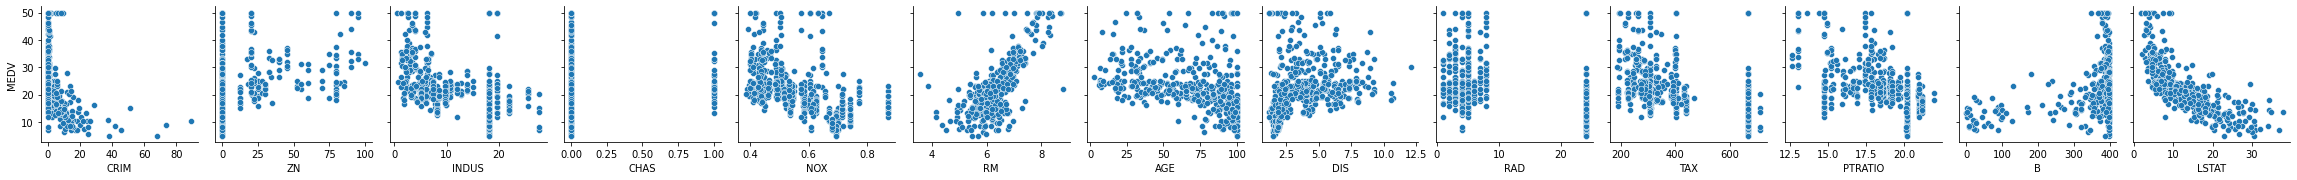

In [51]:
sns.pairplot(data=data, x_vars=data.columns[:-1], y_vars=["MEDV"])
plt.show()

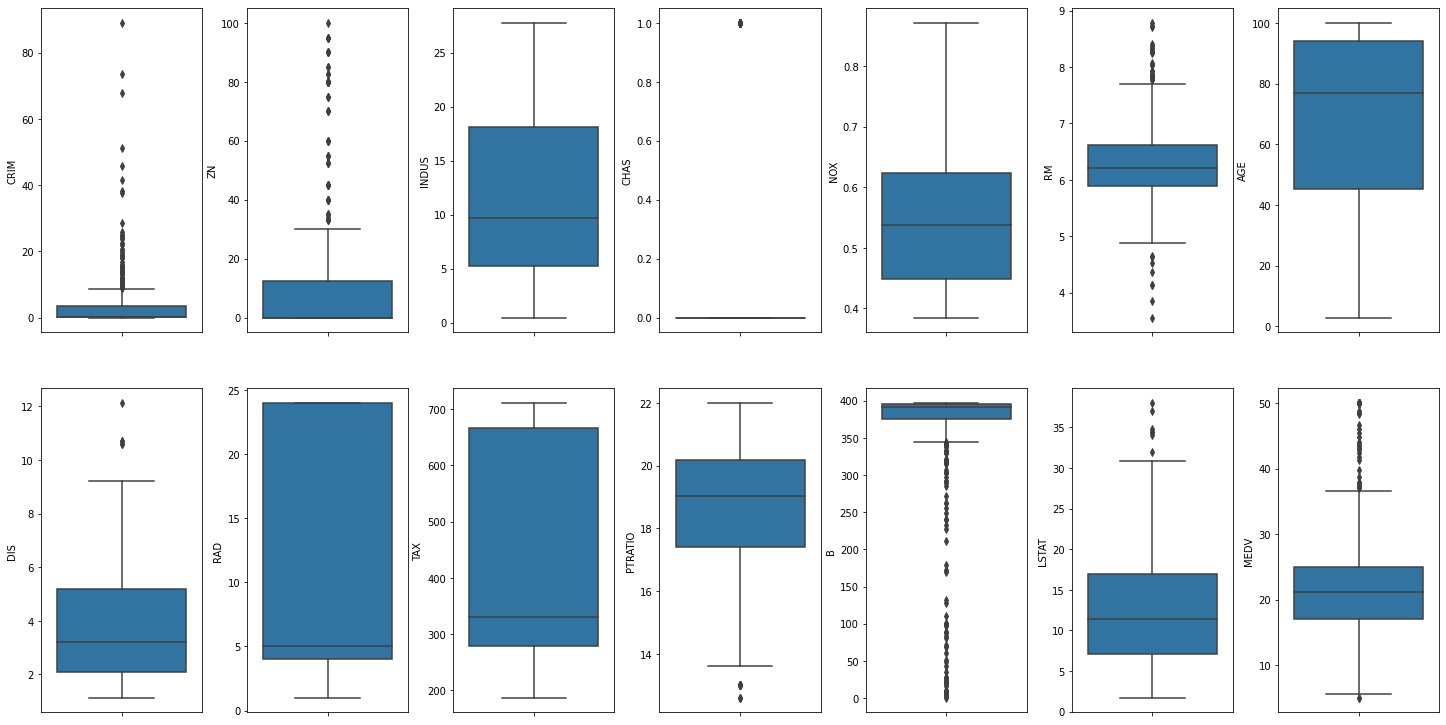

In [52]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

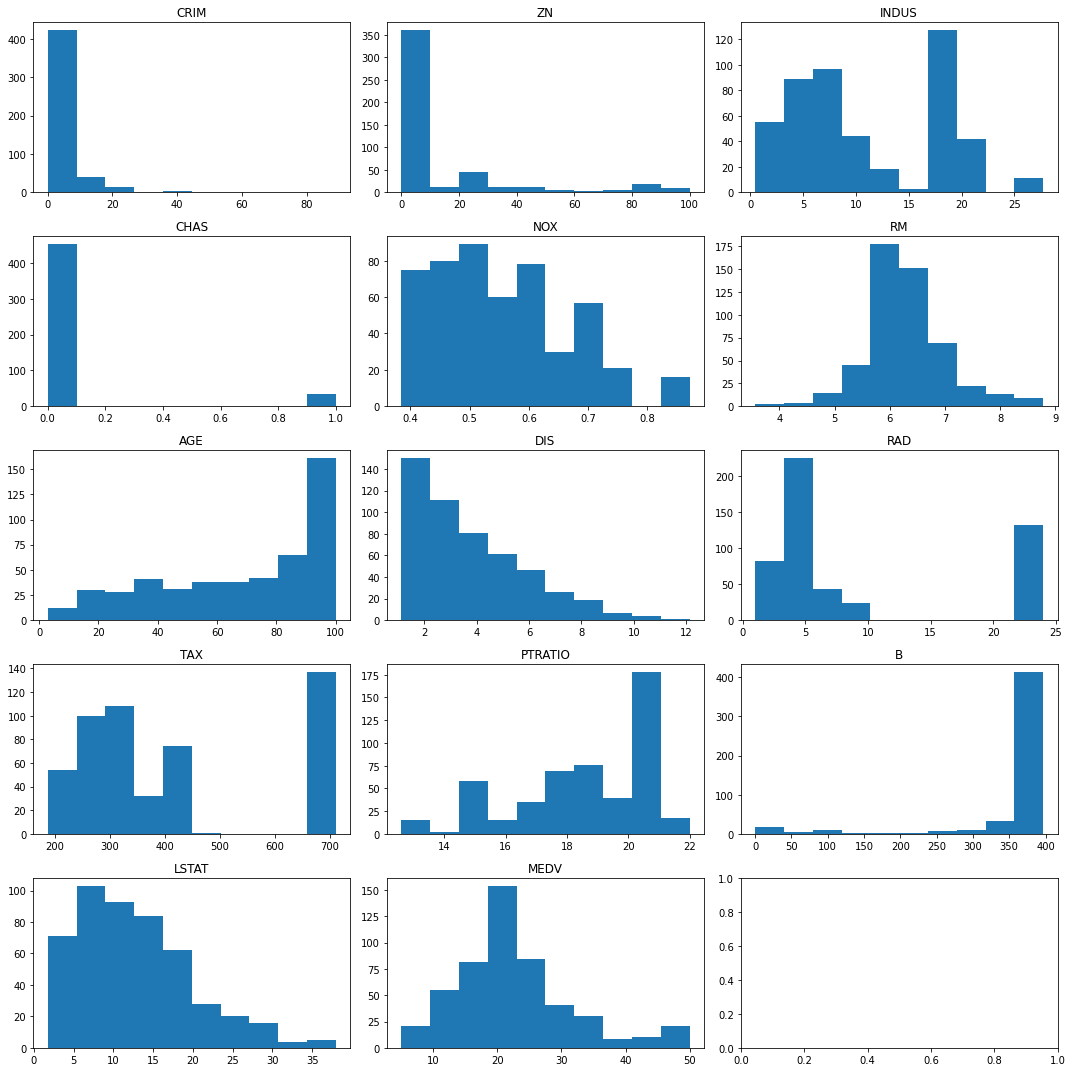

In [53]:
#Histograms of each feature to see the distribution of the data and identify any outliers.
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
axs = axs.ravel()

# Plot each histogram in the corresponding subplot
for i, feature in enumerate(data.columns):
    axs[i].hist(data[feature])
    axs[i].set_title(feature)
    
plt.tight_layout()
plt.show()

In [54]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [55]:
data.fillna(data.mean(),inplace=True)

In [56]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [57]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [58]:
data.drop(['CHAS','RAD','B','ZN'],axis=1)

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,65.200000,4.0900,296,15.3,4.980000,24.0
1,0.02731,7.07,0.469,6.421,78.900000,4.9671,242,17.8,9.140000,21.6
2,0.02729,7.07,0.469,7.185,61.100000,4.9671,242,17.8,4.030000,34.7
3,0.03237,2.18,0.458,6.998,45.800000,6.0622,222,18.7,2.940000,33.4
4,0.06905,2.18,0.458,7.147,54.200000,6.0622,222,18.7,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.100000,2.4786,273,21.0,12.715432,22.4
502,0.04527,11.93,0.573,6.120,76.700000,2.2875,273,21.0,9.080000,20.6
503,0.06076,11.93,0.573,6.976,91.000000,2.1675,273,21.0,5.640000,23.9
504,0.10959,11.93,0.573,6.794,89.300000,2.3889,273,21.0,6.480000,22.0


In [59]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [60]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [68]:
model=CHAIDDecisionTreeRegressor()

In [69]:
model.fit(X_train,y_train)

In [70]:
ypred=model.predict(X_test)


In [71]:
ma=mean_squared_error1(y_test,ypred)

In [72]:
print(ma)

90.35843123799863



###Grid Search

In [73]:
def grid_search_cv(X, y, max_depth_range, min_samples_split_range, n_folds):
    # Initialize the best score and best hyperparameters
    best_score = -float("inf")
    best_max_depth = None
    best_min_samples_split = None

    # Loop through all the possible hyperparameters combinations
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            # Initialize the score for this hyperparameter combination
            score = 0

            # Loop through all the folds of cross-validation
            for i in range(n_folds):
                # Split the data into training and validation sets
                val_indices = np.arange(i * len(X) // n_folds, (i + 1) * len(X) // n_folds)
                train_indices = np.setdiff1d(np.arange(len(X)), val_indices)
                X_train, y_train = X[train_indices], y[train_indices]
                X_val, y_val = X[val_indices], y[val_indices]

                # Initialize the decision tree regressor with the hyperparameters
                tree = CHAIDDecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)

                # Train the decision tree regressor on the training data
                tree.fit(X_train, y_train)

                # Evaluate the decision tree regressor on the validation data
                score += tree.score(X_val, y_val)

            # Calculate the average score for this hyperparameter combination
            score /= n_folds
            
            # Update the best score and best hyperparameters if this score is better
            if (score > best_score).any():
                best_score = score
                best_max_depth = max_depth
                best_min_samples_split = min_samples_split
             

    # Initialize the decision tree regressor with the best hyperparameters
    tree = CHAIDDecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split)

    # Train the decision tree regressor on the full data
    tree.fit(X, y)
  
    
    

    return tree



In [74]:
max_depths = [2, 3, 4,]
min_samples_splits = [2, 5, 10]

In [75]:
v=grid_search_cv(X, y, max_depths, min_samples_splits, 5)

In [76]:
print(v)

In [77]:
param_grid = {'max_depth': [2,3,4], 'min_samples_split': [2,3,5]}

##Random search 

In [78]:
import itertools

In [79]:
from collections import defaultdict
from random import randint
# Define the hyperparameters to be tuned
max_depth = [int(x) for x in np.linspace(2, 14, num = 11)]
min_samples_split = [2, 4, 6, 8, 10,12]
min_samples_leaf = [1, 2, 3, 4, 5,8,10]

# Define the number of iterations for hyperparameter tuning
n_iter = 20

# Define the number of folds for cross-validation
n_folds = None

# Define a function for k-fold cross-validation
def k_fold_cv(X, y, model, n_folds):
    # Initialize a dictionary to store the cross-validation scores
    scores = defaultdict(list)

    # Divide the data into k folds
    fold_size = len(X) // n_folds
    fold_starts = [i * fold_size for i in range(n_folds)]
    fold_ends = [(i + 1) * fold_size for i in range(n_folds)]
    fold_ends[-1] = len(X)

    # Perform k-fold cross-validation
    for i in range(n_folds):
        # Split the data into training and validation sets
        X_train = np.concatenate([X[:fold_starts[i]], X[fold_ends[i]:]])
        y_train = np.concatenate([y[:fold_starts[i]], y[fold_ends[i]:]])
        X_valid = X[fold_starts[i]:fold_ends[i]]
        y_valid = y[fold_starts[i]:fold_ends[i]]

        # Define the hyperparameters to be tuned
        params = {'max_depth': max_depth[randint(0, len(max_depth)-1)],
                  'min_samples_split': min_samples_split[randint(0, len(min_samples_split)-1)],
                  'min_samples_leaf': min_samples_leaf[randint(0, len(min_samples_leaf)-1)]}

        # Train the model with the current hyperparameters
        model.set_params(**params)
        model.fit(X_train, y_train)

        # Evaluate the model on the validation set
        y_pred = model.predict(X_valid)
        mse = mean_squared_error1(y_valid, y_pred)

        # Store the cross-validation score
        scores[mse].append(params)

    # Return the best hyperparameters and the corresponding mean squared error
    best_params = scores[min(scores)][0]
    best_mse = min(scores)

    return best_params, best_mse


# Define the decision tree regressor model
model1 = CHAIDDecisionTreeRegressor()

# Perform the hyperparameter tuning using k-fold cross-validation and randomized search
best_params, best_mse = k_fold_cv(X, y, model1, n_folds=10)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters:", best_params)
print("Best mean squared error:", best_mse)

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 10}
Best mean squared error: 21.52321345221607


##Difference between grid search and random search

Grid search and random search are two popular methods for hyperparameter tuning in machine learning.

The main differences between the two methods are as follows:

**1.Search Strategy**: Grid search is a method that exhaustively searches through a predefined set of hyperparameters, which are specified in advance. In contrast, random search selects hyperparameters randomly from a specified distribution.

**2.Computation**: Grid search can be computationally expensive when the search space is large, as it searches over all possible combinations of hyperparameters. Random search, on the other hand, can be less computationally intensive because it samples a smaller number of hyperparameters.

**3.Flexibility**: Grid search is limited by the hyperparameter values that are specified in advance. If the optimal hyperparameters are not included in the predefined set, grid search may fail to find the best hyperparameters. In contrast, random search is more flexible and can find optimal hyperparameters outside the predefined set.

**4.Performance**: Random search has been shown to perform better than grid search in certain situations, particularly when the number of hyperparameters is large and the optimal hyperparameters are not well-known